In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
df = pd.read_csv('anonymous-results.csv').set_index('stimulus_number')
# with pd.option_context('display.max_rows', None,):
#     display(df)

In [4]:
# # find all entries with file_name == 187_sad_3_steelstring-guitar_FilMel_fingers_new6_20200729.wav
# df[df['file_name'] == '187_sad_3_steelstring-guitar_FilMel_fingers_new6_20200729.wav']
# VERBOSE = True
# # for filename in df['file_name'].unique():
# #     # test = df[df['file_name'] == '96_sad_3_steelstring-guitar_TomCan_pick_and_tapping_new1_20200707.wav']
# #     test = df[df['file_name'] == filename]

# test = df[df['file_name'] == '187_sad_3_steelstring-guitar_FilMel_fingers_new6_20200729.wav']
# import copy
# with pd.option_context('display.max_rows', None,):
#     tt = copy.deepcopy(test)
#     stringmode = lambda x : str(pd.Series.mode(x).values)
#     mode = tt.groupby(['file_name'])[['aggressive','relaxed','sad','happy']].agg(stringmode)
#     if VERBOSE:
#         display(mode)

# modeforemo = lambda x : pd.Series.mode(test[x]).values
# pp = lambda x : print(x,'->',sorted(test[x].values), 'mode:', modeforemo(x))

# # pd.Series.mode(test['aggressive'])
# # print('relaxed ->',sorted(test['relaxed'].values), 'mode:', pd.Series.mode(test['relaxed']).values)
# # pd.Series.mode(test['aggressive'])
# # pd.Series.mode(test['aggressive'])

# modes = {x:modeforemo(x) for x in ['aggressive', 'relaxed', 'happy', 'sad']}
# if VERBOSE:
#     pp('aggressive')
#     pp('relaxed')
#     pp('happy')
#     pp('sad')
#     print('modes:', modes)

# # def bestguess(modes):
# #     topemo = None
# #     topscore = float('-inf')
# #     for emo, modes in modes.items():
# #         if len(modes) == 1:
# #             # print('single emo:', emo, 'score:', modes[0])
# #             if modes[0] > topscore:
# #                 topemo = emo
# #                 topscore = modes[0]
# #     return topemo

# # print('bestguess:', bestguess(modes), 'score:', modes[bestguess(modes)][0])

In [5]:

# display(df.groupby(['file_name'])[['aggressive','relaxed','happy','sad']].agg(pd.Series.mode))
# display(df.groupby(['file_name'])[['aggressive','relaxed','sad']].agg(pd.Series.mode))



stringmode = lambda x : str(pd.Series.mode(x).values)
modesdf = df.groupby(['file_name'])[['aggressive','relaxed','happy','sad']].agg(stringmode)
# reconvert emotion values to lists
modesdf['aggressive'] = modesdf['aggressive'].apply(lambda x : x.strip('[]').split())
modesdf['relaxed'] = modesdf['relaxed'].apply(lambda x : x.strip('[]').split())
modesdf['happy'] = modesdf['happy'].apply(lambda x : x.strip('[]').split())
modesdf['sad'] = modesdf['sad'].apply(lambda x : x.strip('[]').split())

# # Count how many files have at least one emotion with more than one mode
# modesdf['aggressive'] = modesdf['aggressive'].apply(lambda x : len(x)>1)
# modesdf['relaxed'] = modesdf['relaxed'].apply(lambda x : len(x)>1)
# modesdf['happy'] = modesdf['happy'].apply(lambda x : len(x)>1)
# modesdf['sad'] = modesdf['sad'].apply(lambda x : len(x)>1)
# # print the filenames of those files
# res = modesdf[modesdf['aggressive'] | modesdf['relaxed'] | modesdf['happy'] | modesdf['sad']].index.values
# print(len(res),'/',len(modesdf),'files have at least one emotion with more than one mode')

# Convert all emotion columns to int and drop lists with more than one mode
convert = lambda x : int(x[0]) if len(x)==1 else None
for emo in ['aggressive','relaxed','happy','sad']:
    modesdf[emo] = modesdf[emo].apply(convert)
# remove all rows with NaN values
modesdf = modesdf.dropna()
# display(modesdf)


# find top emotion, and label with emotion name or names if multiple modes are the best
filenames = []
top_emotions = []
partial_agreement_with_label = []
for file in modesdf.index.values:    
    # print(file,    np.argmax(modesdf.loc[file].values))
    vals = modesdf.loc[file].values
    # print (file, np.argwhere(vals == np.amax(vals)).flatten().tolist())
    filenames.append(file)
    top_emotions.append(np.argwhere(vals == np.amax(vals)).flatten().tolist())
    agr = False
    for em in top_emotions[-1]:
        # print('_'+str(em)+'_')

        index_to_emo = {0:'aggressive', 1:'relaxed', 2:'happy', 3:'sad'}


        if index_to_emo[em] in file:
            agr = True
    partial_agreement_with_label.append(agr)

# print('%d partial agreements with label' % sum(partial_agreement_with_label))


resdf = pd.DataFrame({'file_name':filenames, 'top_emotion':top_emotions, 'partial_agreement_with_label':partial_agreement_with_label})

#############################################################################
# To remove disagreement with label, uncomment the following line
resdf = resdf[resdf['partial_agreement_with_label'] == True]
#############################################################################



# sort resdf by top_emotion
resdf = resdf.sort_values(by=['top_emotion'])

# display(resdf)
# print df to file and open with code
# resdf.to_csv('re.csv', index=True)

def writeCsv(c):
    with open('re.csv', 'w') as f:
        f.write('file_name,top_emotion\n')
        prevemo = None
        for filename in resdf['file_name'].values:
            emostr = ''
            
            # emo = resdf[resdf['file_name']==filename]['top_emotion'].values.flatten().tolist()
            emo = resdf[resdf['file_name']==filename]['top_emotion']
            # .values.flatten().tolist()
            # assert len(emo) == 1
            # emo = emo[0]
            # emo = [index_to_emo[e] for e in emo]

            if prevemo != emo and prevemo != None:
                f.write('\n')
            f.write(filename+',\"'+str(emo)+'\"\n')
            prevemo = emo


# os.system('code re.csv')

# df.groupby(['file_name'])


In [6]:
# emotionList = ["aggressive", "relaxed", "happy", "sad"]
emotionList = ["aggr", "rel", "hap", "sad"]


def replaceEmotionListWithStrName(entry):
    if type(entry) == list:
        resstr = ""
        entry.sort()
        for emoIdx in entry:
            resstr += emotionList[emoIdx] + "/"
        resstr = resstr[:-1]
        return resstr
    else:
        return entry


# apply to resdf
resdf["top_emotion"] = resdf["top_emotion"].apply(replaceEmotionListWithStrName)

# resdf.head()
# writeCsv(resdf)

with open('re.csv', 'w') as f:
    f.write('file_name,top_emotion\n')
    prevemo = None
    for filename in resdf['file_name'].values:
        # print(filename)
        emostr = ''
        
        # emo = resdf[resdf['file_name']==filename]['top_emotion'].values.flatten().tolist()
        emo = resdf[resdf['file_name']==filename]['top_emotion'].values[0]
        # .values.flatten().tolist()
        # assert len(emo) == 1
        # emo = emo[0]
        # emo = [index_to_emo[e] for e in emo]


        if prevemo != emo and prevemo != None:
            f.write('\n')
        f.write(filename+',\"'+str(emo)+'\"\n')
        prevemo = emo

In [7]:
# import re
# # Correct names
# def correct_name(filename):
#     if type(filename) != str:
#         return None
#     fn = re.sub('_new\d_','_',filename)
#     # 145_aggressive_1_steelstring-guitar_AleMar_pick_new9_20200724.wav

#     fn = re.sub(r'^(\d+)_([a-z]+)_(\d+)_(.+)',r'\1_\2_i\3_\4',fn)
#     return fn

# # _([a-z]+)_(\d+)_(*+)

# print(correct_name('145_aggressive_1_steelstring-guitar_AleMar_pick_new9_20200724.wav') )

In [8]:
# Now, since we plan to have at least 4 different tracks for each distinct topemotion field
# we take classes with less than 4 tracks (e.g.aggressive/relaxed: 1 track) and add more from classes
# that include the same topemoptions (e.g. aggressive/relaxed/happy, aggressive/relaxed/sad, etc.)

# I did this manually and saved it in file "emotional_playback_tracks.csv" 
# However, we still have to rename the files to match the new naming convention.
# So we:
# 1. remove all _new\d_ from filenames
# 2. add a 'i' before numerical intensity values

# Now we load this and create a puredata file with filenames as messages to be played back, grouped by the playback_emotion field
emopb = pd.read_csv('emotional_playback_tracks.csv')

MAX_TRACKS_PER_EMOTION = 20

import re
def correct_name(filename):
    if type(filename) != str:
        return None
    fn = re.sub('_new\d_','_',filename)
    # 145_aggressive_1_steelstring-guitar_AleMar_pick_new9_20200724.wav

    fn = re.sub(r'^(\d+)_([a-z]+)_(\d+)_(.+)',r'\1_\2_i\3_\4',fn)

    fn = 'norm_' + fn
    return fn


emopb['file_name'] = emopb['file_name'].apply(correct_name)



pd_file_lines = []
pd_file_lines.append('#N canvas 1920 96 2560 1316 12;')

startingX = 10
startingY = 50

pd_object_counter = -1

OBJ_HEIGHT = 20
Y_SPACER = 10

incrementX = 550
currentX = startingX
for eidx,cur_emo in enumerate(emopb['playback_emotion'].unique()):
    currentY = startingY
    curemostr = '/'.join([af.capitalize() for af in cur_emo.split('/')])

    curnumfiles = min(len(emopb[emopb['playback_emotion']==cur_emo]),MAX_TRACKS_PER_EMOTION)
    ##################################################################################################
    ## Creating cycle play structure
    ##################################################################################################

    # #X obj 93 101 cycleCounter, f 13;
    # #X obj 181 48 loadbang;
    # #X msg 181 72 8;
    # #X obj 93 77 bng 15 250 50 0 empty empty empty 17 7 0 10 -262144 -1
    # -1;
    # #X obj 93 157 vradio 15 1 0 8 empty empty empty 0 -8 0 10 -262144 -1
    # -1 0;
    # #X obj 93 48 r \$0-replay;
    # #X text 216 72 Num of tracks below;

    pd_file_lines.append('#X obj {} {} r \$0-{};' .format(currentX,currentY,curemostr.replace('/','').strip()) )
    pd_object_counter+=1
    r_idx = pd_object_counter
    pd_file_lines.append('#X obj {} {} loadbang;' .format(currentX+151,currentY) )
    pd_object_counter+=1
    loadbang_idx = pd_object_counter
    currentY += OBJ_HEIGHT + Y_SPACER # incrementY

    pd_file_lines.append('#X obj {} {} bng 15 250 50 0 empty empty empty 17 7 0 10 -262144 -1 -1;' .format(currentX,currentY) )
    pd_object_counter+=1
    bng_idx = pd_object_counter
    pd_file_lines.append('#X msg {} {} {};' .format(currentX+151,currentY,curnumfiles) )
    pd_object_counter+=1
    numfiles_idx = pd_object_counter
    currentY += OBJ_HEIGHT + Y_SPACER # incrementY


    pd_file_lines.append('#X obj {} {} cycleCounter, f 22;' .format(currentX,currentY) )
    currentY += OBJ_HEIGHT + Y_SPACER # incrementY
    pd_object_counter+=1
    cycleCounter_idx = pd_object_counter



    pd_file_lines.append('#X obj {} {} vradio 15 1 0 {} empty empty empty 0 -8 0 10 -262144 -1 -1 0;' .format(currentX,currentY,curnumfiles) )
    pd_object_counter+=1
    vradio_idx = pd_object_counter

    # Connect all properly
    pd_file_lines.append('#X connect {} 0 {} 0;' .format(r_idx, bng_idx) )
    pd_file_lines.append('#X connect {} 0 {} 0;' .format(loadbang_idx, numfiles_idx) )
    pd_file_lines.append('#X connect {} 0 {} 0;' .format(bng_idx, cycleCounter_idx) )
    pd_file_lines.append('#X connect {} 0 {} 2;' .format(numfiles_idx, cycleCounter_idx) )
    pd_file_lines.append('#X connect {} 0 {} 0;' .format(cycleCounter_idx, vradio_idx) )
    # pd_file_lines.append('#X connect {} 0 {} 0;' .format(vradio_idx, r_idx) )
   


    currentX += 30
    ##################################################################################################
    ## Creating Comment
    ##################################################################################################
    # #X obj 39 139 cnv 15 180 30 empty empty empty 20 12 0 14 -261682 -66577
    # 0;
    pd_file_lines.append('#X obj {} {} cnv 15 180 30 empty empty empty 20 12 0 14 -261682 -66577' .format(currentX,currentY) )
    pd_file_lines.append(' 0;')
    pd_object_counter+=1

    pd_file_lines.append('#X text {} {} {};' .format(currentX+5,currentY+5,curemostr))
    currentY += OBJ_HEIGHT + Y_SPACER # incrementY
    pd_object_counter+=1
    num_files = emopb[emopb['playback_emotion']==cur_emo].shape[0]
    print(eidx, cur_emo, num_files)

    incrementY = 30

    msg_idxs = []
    pd_file_lines.append('#X obj {} {} sel {};' .format(currentX,currentY," ".join([str(inasdf) for inasdf in range(curnumfiles)])) )
    currentY += OBJ_HEIGHT + Y_SPACER # incrementY
    pd_object_counter+=1
    sel_idx = pd_object_counter
    
    for fids in range(curnumfiles):
        pd_file_lines.append('#X msg {} {} {}' .format(currentX,currentY,emopb[emopb['playback_emotion']==cur_emo].iloc[fids]['file_name']) )
        pd_file_lines.append(', f 75;' )
        currentY += OBJ_HEIGHT + Y_SPACER
        pd_object_counter+=1
        msg_idxs.append(pd_object_counter)
    #X obj 54 226 list;
    pd_file_lines.append('#X obj {} {} list;' .format(currentX,currentY))
    currentY += OBJ_HEIGHT + Y_SPACER
    pd_object_counter+=1
    list_idx = pd_object_counter

    # Connect each outlet of sel (except last) to each msg
    print('sel_idx', sel_idx)
    print('msg_idxs', '\n'.join([str(asdf) for asdf in msg_idxs]))
    pd_file_lines.append('#X connect {} 0 {} 0;' .format(vradio_idx,sel_idx))
    for selout in range(curnumfiles):
        pd_file_lines.append('#X connect {} {} {} 0;' .format(sel_idx,selout, msg_idxs[selout]) )
        pd_file_lines.append('#X connect {} 0 {} 0;' .format(msg_idxs[selout], list_idx) )


    ## Add msg ./database/$1
    pd_file_lines.append('#X msg {} {} ./database/\$1;' .format(currentX,currentY))
    currentY += OBJ_HEIGHT + Y_SPACER
    pd_object_counter+=1
    dbmsg_idx = pd_object_counter
    ## Add another list object
    pd_file_lines.append('#X obj {} {} list;' .format(currentX,currentY))
    currentY += OBJ_HEIGHT + Y_SPACER
    pd_object_counter+=1
    list2_idx = pd_object_counter
    ## Add play msg
    pd_file_lines.append('#X msg {} {} play \\$1;' .format(currentX,currentY))
    currentY += OBJ_HEIGHT + Y_SPACER
    pd_object_counter+=1
    msg_play_idx = pd_object_counter

    ## Add receive object for $0-stopplay
    pd_file_lines.append('#X obj {} {} r \$0-stopplay;' .format(currentX+40,currentY))
    currentY += OBJ_HEIGHT + Y_SPACER
    pd_object_counter+=1
    stopplay_idx = pd_object_counter
    ## Add receive for $0-numToPlay
    pd_file_lines.append('#X obj {} {} r \$0-numToPlay;' .format(currentX+80,currentY))
    currentY += OBJ_HEIGHT + Y_SPACER
    pd_object_counter+=1
    numToPlay_idx = pd_object_counter
    ## Add msg numToPlay $1
    pd_file_lines.append('#X msg {} {} numToPlay \\$1;' .format(currentX+80,currentY))
    currentY += OBJ_HEIGHT + Y_SPACER
    pd_object_counter+=1
    msg_numToPlay_idx = pd_object_counter
    ## add playMultipTracks object
    pd_file_lines.append('#X obj {} {} playMultipTracks;' .format(currentX,currentY))
    currentY += OBJ_HEIGHT + Y_SPACER
    pd_object_counter+=1
    playMultipTracks_idx = pd_object_counter
    ## add throw~ MonoOut object
    pd_file_lines.append('#X obj {} {} throw~ MonoOut;' .format(currentX,currentY))
    pd_object_counter+=1
    throw_idx = pd_object_counter
    ## add bng 
    pd_file_lines.append('#X obj {} {} bng 15 250 50 0 empty empty empty 17 7 0 10 -262144 -1 -1;' .format(currentX+109,currentY) )
    pd_object_counter+=1
    bng_idx = pd_object_counter
    currentY += OBJ_HEIGHT + Y_SPACER
    ## add send for current emotion play
    pd_file_lines.append('#X obj {} {} s \$0-{};' .format(currentX+109,currentY,curemostr.replace('/','').strip()) )
    pd_object_counter+=1
    send_idx = pd_object_counter
    currentY += OBJ_HEIGHT + Y_SPACER

    ## Now connect all second part to list 1
    pd_file_lines.append('#X connect {} 0 {} 0;' .format(list_idx, dbmsg_idx) )
    pd_file_lines.append('#X connect {} 0 {} 0;' .format(dbmsg_idx, list2_idx) )
    pd_file_lines.append('#X connect {} 0 {} 0;' .format(list2_idx, msg_play_idx) )
    pd_file_lines.append('#X connect {} 0 {} 0;' .format(msg_play_idx, playMultipTracks_idx) )
    pd_file_lines.append('#X connect {} 0 {} 0;' .format(stopplay_idx, playMultipTracks_idx) )
    pd_file_lines.append('#X connect {} 0 {} 0;' .format(numToPlay_idx, msg_numToPlay_idx) )
    pd_file_lines.append('#X connect {} 0 {} 0;' .format(msg_numToPlay_idx, playMultipTracks_idx) )
    pd_file_lines.append('#X connect {} 0 {} 0;' .format(playMultipTracks_idx, throw_idx) )
    pd_file_lines.append('#X connect {} 1 {} 0;' .format(playMultipTracks_idx, bng_idx) )
    pd_file_lines.append('#X connect {} 0 {} 0;' .format(bng_idx, send_idx) )




    currentX += incrementX
    # if eidx == 0:
    #     break

with open('emotional_playback_tracks.pd', 'w') as f:
    f.write('\n'.join(pd_file_lines))




0 aggr 52
sel_idx 8
msg_idxs 9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
1 aggr/rel 4
sel_idx 48
msg_idxs 49
50
51
52
2 aggr/rel/hap 4
sel_idx 72
msg_idxs 73
74
75
76
3 aggr/rel/hap/sad 5
sel_idx 96
msg_idxs 97
98
99
100
101
4 aggr/rel/sad 4
sel_idx 121
msg_idxs 122
123
124
125
5 aggr/hap 6
sel_idx 145
msg_idxs 146
147
148
149
150
151
6 aggr/hap/sad 4
sel_idx 171
msg_idxs 172
173
174
175
7 aggr/sad 11
sel_idx 195
msg_idxs 196
197
198
199
200
201
202
203
204
205
206
8 rel 27
sel_idx 226
msg_idxs 227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
9 rel/hap 16
sel_idx 266
msg_idxs 267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
10 rel/hap/sad 7
sel_idx 302
msg_idxs 303
304
305
306
307
308
309
11 rel/sad 20
sel_idx 329
msg_idxs 330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
12 hap 21
sel_idx 369
msg_idxs 370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
13 hap/sad 5
se

In [74]:
display(emopb)

,file_name,playback_emotion,annotated_emotion
0,249_aggressive_2_classical-guitar_CesSam_finge...,aggr,aggr
1,332_aggressive_1_classical-guitar_AntDel_pick_...,aggr,aggr
2,237_aggressive_2_classical-guitar_FedCer_finge...,aggr,aggr
3,87_aggressive_3_steelstring-guitar_TomCan_pick...,aggr,aggr
4,160_aggressive_1_steelstring-guitar_MasChi_pic...,aggr,aggr
...,...,...,...
202,319_sad_3_steelstring-guitar_GioDic_fingers_ne...,sad,sad
203,343_sad_3_classical-guitar_AntDel_fingers_new8...,sad,sad
204,379_sad_3_classical-guitar_AngLoi_fingers_new5...,sad,sad
205,209_sad_1_classical-guitar_TizBol_fingers_new7...,sad,sad


In [27]:
# Group the data by "file_name"
grouped_data = df.groupby("file_name")

# Define a function to calculate the mode while handling possible cases of multiple modes
def calculate_mode(series):
    try:
        return pd.Series.mode(series) #series.mode().iloc[0]
    except:
        return None

# Calculate the mode for the specified columns within each group
result = grouped_data.agg({
    "aggressive": calculate_mode,
    "relaxed": calculate_mode,
    # "happy": calculate_mode,
    "sad": calculate_mode
}).reset_index()

# Display the result
display(result)

,file_name,aggressive,relaxed,sad
0,100_happy_1_steelstring-guitar_TizCam_pick_new...,-2,1,-2
1,101_happy_2_steelstring-guitar_TizCam_pick_new...,0,-1,0
2,102_happy_3_steelstring-guitar_TizCam_pick_new...,1,"[-1, 2]",1
3,103_relaxed_1_steelstring-guitar_TizCam_pick_n...,1,1,0
4,104_relaxed_2_steelstring-guitar_TizCam_pick_n...,-2,2,1
...,...,...,...,...
386,96_sad_3_steelstring-guitar_TomCan_pick_and_ta...,-2,"[-1, 2]",0
387,97_aggressive_1_steelstring-guitar_TizCam_pick...,2,-2,0
388,98_aggressive_2_steelstring-guitar_TizCam_pick...,1,-2,0
389,99_aggressive_3_steelstring-guitar_TizCam_pick...,2,-2,0


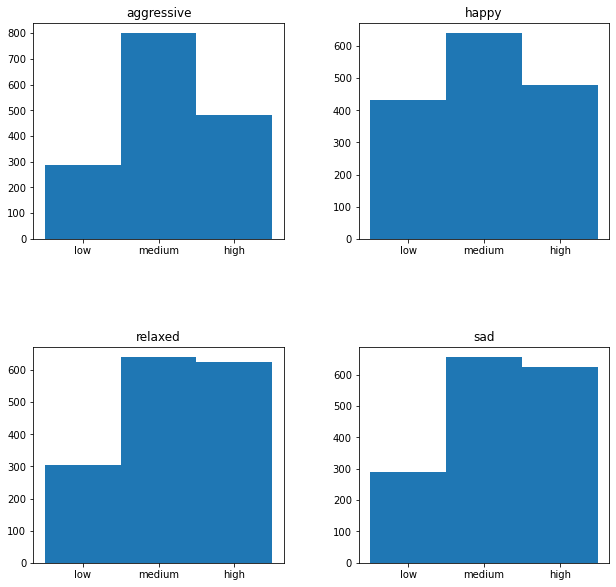

In [6]:
axes = df.hist('emotional_intent_value', by='emotional_intent', bins=(0.5, 1.5, 2.5, 3.5), figsize=(10, 10))
for ax in axes.ravel():
    ax.set_xticks((1, 2, 3))
    ax.set_xticklabels(('low', 'medium', 'high'), rotation=0)

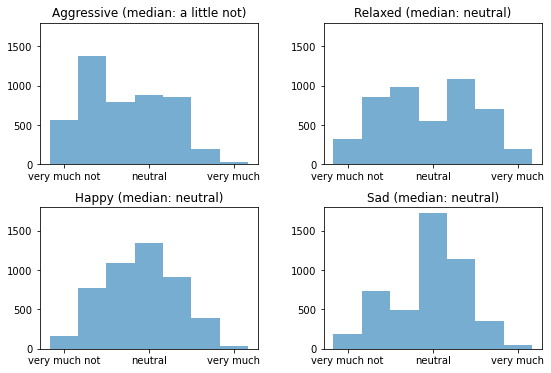

In [7]:
# import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(9, 6))
for emotion, ax in zip(['aggressive', 'relaxed', 'happy', 'sad'], axes.ravel()):
    nonintent = df.query('emotional_intent != @emotion')
    # sns.distplot(nonintent[emotion], ax=ax, bins=np.linspace(-3.5, 3.5, num=8, endpoint=True), kde=False)
    axes = nonintent.hist(emotion, grid=False, ax=ax, color='C0', alpha=0.6, bins=np.linspace(-3.5, 3.5, num=8, endpoint=True)) #[-3.5, -0.5, 0.5, 3.5])
    ax.set_ylim((0, 1800))
    levels = ['very much not', 'not', 'a little not', 'neutral', 'a little', 'present', 'very much']
    ax.set_title(f'{emotion.title()} (median: {levels[3+int(nonintent[emotion].median())]})')
    ax.set_xticks((-3, 0, 3)) #range(-3, 4))
    ax.set_xticklabels(('very much not', 'neutral', 'very much'), rotation=0)

In [8]:
df.groupby('emotional_intent_value').agg({'correct':['mean','std']})

correct          
                            mean       std
emotional_intent_value                    
1                       0.348323  0.476621
2                       0.417763  0.493281
3                       0.457880  0.498336

<AxesSubplot:>

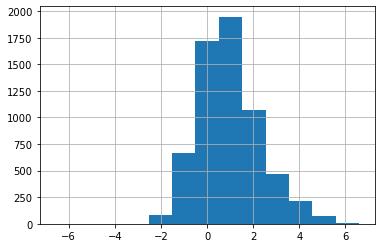

In [9]:
df['intent_rating_difference'].hist(bins=np.linspace(-6.6, 6.6, 14))

<AxesSubplot:>

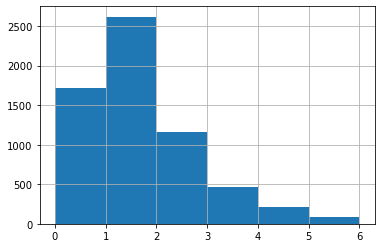

In [10]:
abs(df['intent_rating_difference']).hist(bins=np.linspace(0, 6, 7))